# 3) sentiment analysis of Product review dataset

In [1]:
from google.colab import drive

In [2]:
with open('/content/drive/MyDrive/dataset.txt', 'r') as file:
  data=file.readlines()

In [3]:
data[0]

'__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n'

# Text preprocessing

In [4]:
import re
data_texts = []
data_labels = []
for line in data:
    if "__label__1" in line:
        data_labels.append(1)
    elif "__label__2" in line:
        data_labels.append(2)
    text = re.split(r'__label__1|__label__2', line)[-1].strip()
    data_texts.append(text)
print("First few labels:", data_labels[:10])
print("First few texts:", data_texts[:5])

First few labels: [2, 2, 1, 2, 2, 1, 1, 1, 2, 1]
First few texts: ['Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"', "One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful trac

In [5]:
split_texts = []
for text in data_texts:
    parts = text.split(":")
    first_part = parts[0]
    split_texts.append(first_part)
print(split_texts[10])


Great book for travelling Europe


In [6]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
port_stem=PorterStemmer()
stop_words = set(stopwords.words('english'))
def stemming(content):
    words = word_tokenize(content)
    stemmed_words = [port_stem.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    stemmed_content = ' '.join(stemmed_words)
    return stemmed_content

In [8]:
data_texts_stemmed = [stemming(text) for text in split_texts ]

# Data splitting

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_texts_stemmed,data_labels,test_size=0.2,random_state=2)

# Text vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [11]:
from collections import Counter

# Assuming y_test is your list of labels
counter = Counter(y_test)

# Print counts of each unique value
for label, count in counter.items():
    print(f"{label}: {count}")


1: 39778
2: 40222


# Model training using Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Accuracy

In [20]:
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(x_train)
training_data_accuracy = accuracy_score(y_train ,x_train_prediction )
print("training accuracy: ",training_data_accuracy)

training accuracy:  0.824771875


In [21]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test ,x_test_prediction )
print("testing accuracy :",testing_data_accuracy)

testing accuracy : 0.7922125


# Confusion Matrix

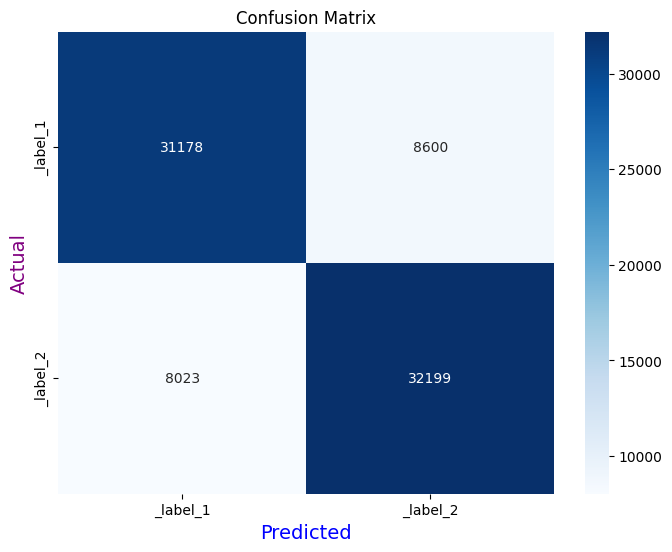

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
class_labels = ['_label_1', '_label_2']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()

# Model training using Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

# Accuracy

In [23]:
x_train_prediction=clf.predict(x_train)
training_data_accuracy = accuracy_score(y_train ,x_train_prediction )
print("training accuracy: ",training_data_accuracy)

training accuracy:  0.81770625


In [24]:
x_test_prediction=clf.predict(x_test)
testing_data_accuracy = accuracy_score(y_test ,x_test_prediction )
print("testing accuracy :",testing_data_accuracy)

testing accuracy : 0.7861875


# Confusion Matrix

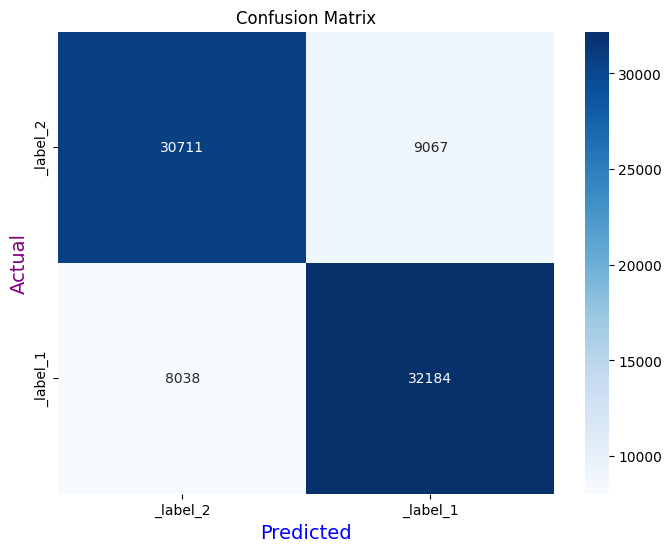

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predicted = clf.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
class_labels = ['_label_2', '_label_1']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()